sample T5
==

T5 is the sample tested in situ with Nanox

In [1]:
import numpy as np
import vtk
import os
import h5py
from pymicro.crystal.microstructure import Microstructure
#from esrf_mat_file import esrf_mat_file
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pymicro.crystal.lattice

lambda_keV = 38.0
lambda_nm = 1.2398/ lambda_keV
Ti7Al = pymicro.crystal.lattice.Lattice.hexagonal(0.2931, 0.4694)  # nm

`t5_dct_cen_1_` is the second scan of the region *cen*, after the sample was mounted into nanox. there is a correspondance between the ids of scan `cen_` and `cen_1_` (eg 4 remained 4 but 3 became 16):

| 52 | 16 | 13 | 7 | 73 | 24 | 36 | 62 | 2 | 3 | 4 |
| --- |
| 85 | 17 | 12 | 9 | 79 | 24 | 32 | 66 | 1 | 16 | 4 |



In [5]:
tt_ids = [85, 17, 12, 9, 79, 24, 32, 66, 1, 16, 4]
micro = Microstructure.from_dct(data_root='id11/t5_/t5_dct_cen_1_/', grain_ids=tt_ids)

loaded volume with shape: 634 x 634 x 424
loading grain 85
adding block 0 to mesh for grain 85
loading grain 17
adding block 1 to mesh for grain 17
loading grain 12
adding block 2 to mesh for grain 12
loading grain 9
adding block 3 to mesh for grain 9
loading grain 79
adding block 4 to mesh for grain 79
loading grain 24
adding block 5 to mesh for grain 24
loading grain 32
adding block 6 to mesh for grain 32
loading grain 66
adding block 7 to mesh for grain 66
loading grain 1
adding block 8 to mesh for grain 1
loading grain 16
adding block 9 to mesh for grain 16
loading grain 4
adding block 10 to mesh for grain 4


In [50]:
micro.save()

deprecated as we are moving to hdf5 format
deprecated as we are moving to hdf5 format
deprecated as we are moving to hdf5 format
deprecated as we are moving to hdf5 format
deprecated as we are moving to hdf5 format
deprecated as we are moving to hdf5 format
deprecated as we are moving to hdf5 format
deprecated as we are moving to hdf5 format
deprecated as we are moving to hdf5 format
deprecated as we are moving to hdf5 format
deprecated as we are moving to hdf5 format
writing empty.xml
writing empty.vtm


In [6]:
# check the position of each grain the the XYZ frame (DCT)
for g in micro.grains:
    print('grain {:d} position: {}, R vector={}'.format(g.id, g.position.ravel(), g.orientation.rod))
    #print('grain %2d position: %6.3f, %6.3f, %6.3f' % (g.id, g.position[0], g.position[1], g.position[2]))

grain 85 position: [-0.30667789  0.14885904 -0.2360733 ], R vector=[ 0.56281019 -0.55332944 -0.1490777 ]
grain 17 position: [-0.25285065  0.23365872 -0.15332787], R vector=[-0.79743867 -0.37001274 -0.22803878]
grain 12 position: [-0.2189367   0.19842558  0.00169154], R vector=[ 0.5044968  -0.18028722  0.20159328]
grain 9 position: [-0.25945231  0.01951914 -0.11399903], R vector=[-0.41470926  0.1857377  -0.0852515 ]
grain 79 position: [-0.2915957   0.12344417  0.04555738], R vector=[-0.61753458  0.2493624  -0.00907891]
grain 24 position: [-0.23799966  0.00479514  0.02481045], R vector=[-0.40222288  0.55295877 -0.25101311]
grain 32 position: [-0.26947459  0.01408651  0.13337285], R vector=[ 0.24896185 -0.77414278  0.23366512]
grain 66 position: [-0.29447679 -0.16352746 -0.01744424], R vector=[-0.57844176  0.65015115 -0.22438162]
grain 1 position: [-0.02831941  0.13745424 -0.0659915 ], R vector=[ 0.02989752 -0.8187586   0.22855322]
grain 16 position: [-0.09676189  0.17442042 -0.22916423],

EBSD / DCT comparison at the surface
--

Here is the surface scan of the T5 sample:

![title](Grain ID.bmp)

And this is the surface view of the `t5_dct_cen_1_` scan:

<img src="t5_dct_cen_3d.png", width=300, height=300>

The DCT scan zone can be clearly identified in the EBSD scan. Because how matlab writes the data, to make the image above (see the code below), we need to swap X and Z axes in the DCT volume. We should make sur this is correct.

In [26]:
f = h5py.File(os.path.join('id11/t5_/t5_dct_cen_1_/5_reconstruction', 'phase_01_vol.mat'))
grain_ids = f['vol'].value[::3, 100:540:3, 80:560:3].transpose(2, 1, 0)
dims = np.array(grain_ids.shape)

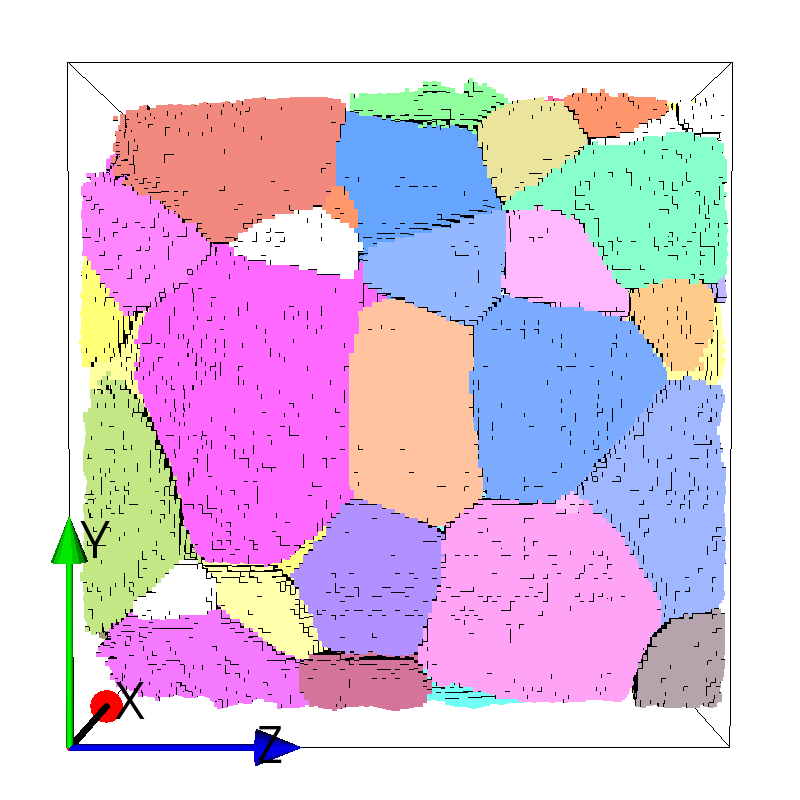

In [4]:
from pymicro.view.scene3d import Scene3D
from pymicro.view.vtk_utils import show_grains, axes_actor, box_3d, setup_camera
from IPython.display import Image

grains = show_grains(grain_ids)
box = box_3d(size=dims)
axes = axes_actor(50, axisLabels=('X', 'Y', 'Z'), fontSize=50)
s3d = Scene3D(display=True, ren_size=(800, 800), name='t5_dct_cen_3d')
s3d.add(grains)
s3d.add(box)
s3d.add(axes)
cam = setup_camera(size=dims)
cam.SetFocalPoint(0.5 * dims)
cam.SetViewUp(0, 1, 0)
cam.SetPosition(-2 * dims[0], 0.5 * dims[0], 0.5 * dims[2])
s3d.set_camera(cam)
im = s3d.get_frame()
Image(im)

In [11]:
print(np.__version__)
tt_mask = np.isin(grain_ids, tt_ids)
tt_grains = grain_ids * tt_mask

1.16.2


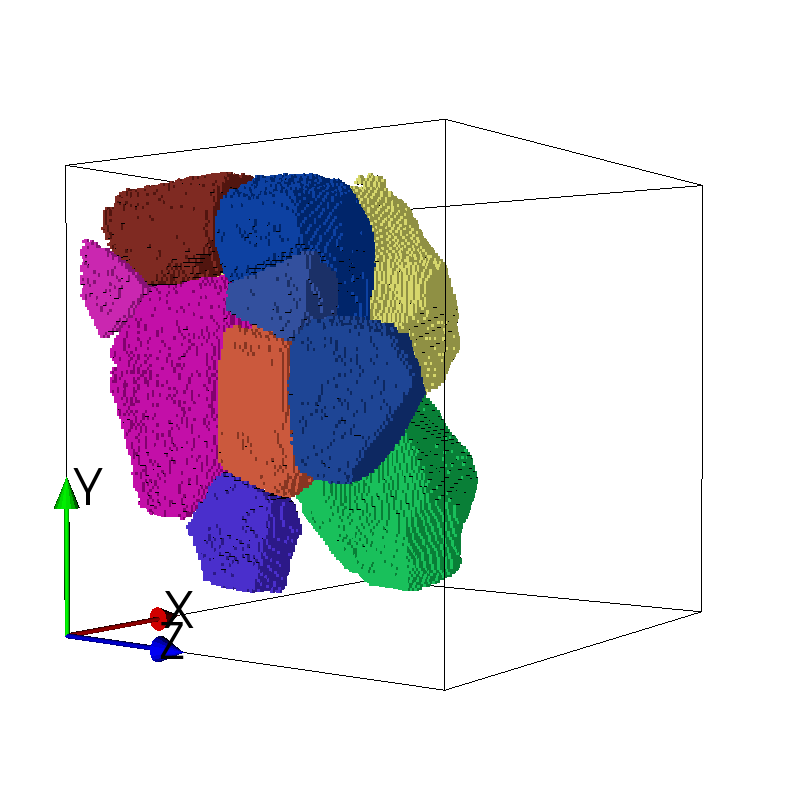

In [16]:
# show only grains imaged with TT
grains = show_grains(tt_grains)
box = box_3d(size=dims)
axes = axes_actor(50, axisLabels=('X', 'Y', 'Z'), fontSize=50)
s3d = Scene3D(display=True, ren_size=(800, 800), name='t5_dct_cen_3d')
s3d.add(grains)
s3d.add(box)
s3d.add(axes)
cam = setup_camera(size=dims)
cam.SetFocalPoint(0.5 * dims)
cam.SetViewUp(0, 1, 0)
cam.SetPosition(-2 * dims[0], 0.5 * dims[0], 2.5 * dims[2])
s3d.set_camera(cam)
im = s3d.get_frame()
Image(im)

In [3]:
from scipy import ndimage
# figure out the center of mass of each grain taking the center of the image as reference
f = h5py.File(os.path.join('id11/t5_/t5_dct_cen_1_/5_reconstruction', 'phase_01_vol.mat'))
array = f['vol'].value.transpose(2, 1, 0)
print(array.shape)
voxel_size = 0.0014
for label in [1, 5, 9, 24]:
    array_bin = (array == label).astype(np.uint8)
    local_com = ndimage.measurements.center_of_mass(array_bin, array)
    com_mm = voxel_size * (local_com - 0.5 * np.array(array.shape))
    print('grain %2d position: %6.3f, %6.3f, %6.3f' % (label, com_mm[0], com_mm[1], com_mm[2]))

(634, 634, 424)
grain  1 position: -0.030,  0.140, -0.069
grain  5 position: -0.144, -0.091, -0.168
grain  9 position: -0.257,  0.022, -0.117
grain 24 position: -0.239,  0.005,  0.026


In [22]:
front_slice = array[100, 100:-100, :]
front_slice = np.rot90((array[100, 100:-100, :]).T)
gids = np.unique(front_slice)
centers = np.zeros((len(gids) - 2, 2))
i = 0
print(' gid | center (x, y)\n' + 20 * '-')
for gid in gids:
    if gid < 1:
        continue
    # compute the center of mass of each grain in this image
    centers[i] = ndimage.measurements.center_of_mass(front_slice == gid, front_slice)
    print('%4d | (%d, %d)' % (gid, int(centers[i, 0]), int(centers[i, 1])))
    i += 1

 gid | center (x, y)
--------------------
   7 | (274, 387)
   9 | (209, 117)
  12 | (67, 216)
  17 | (57, 104)
  19 | (345, 300)
  20 | (377, 82)
  24 | (222, 221)
  32 | (207, 312)
  39 | (181, 29)
  52 | (284, 33)
  53 | (83, 378)
  66 | (329, 194)
  68 | (16, 237)
  74 | (178, 412)
  76 | (347, 123)
  78 | (120, 316)
  79 | (125, 241)
  85 | (106, 39)
  88 | (409, 246)
  94 | (47, 293)
  97 | (395, 187)
 101 | (383, 398)
 104 | (35, 371)
 108 | (104, 149)
 110 | (25, 351)
 115 | (153, 389)
 117 | (154, 16)
 126 | (331, 72)
 133 | (87, 163)
 134 | (27, 409)
 135 | (136, 419)
 139 | (84, 168)
 142 | (277, 323)


0
[0. 0. 0.]


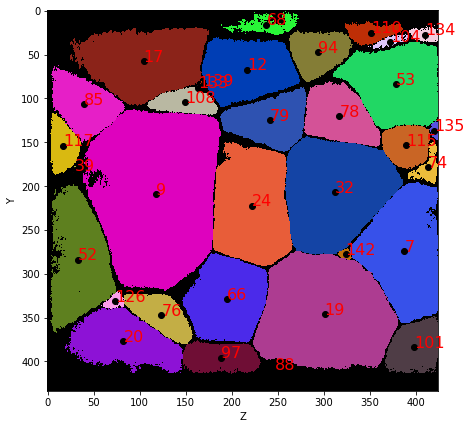

In [23]:
from matplotlib import pyplot as plt, cm
from pymicro.crystal.microstructure import Microstructure
%matplotlib inline

print(front_slice[0, 0])
rand_cmap = Microstructure.rand_cmap(N=142, first_is_black=True)
print(rand_cmap.colors[0])
plt.figure(figsize=(7, 7))
plt.imshow(front_slice, interpolation='nearest', cmap=rand_cmap)
for i in range(centers.shape[0]):
    plt.plot(centers[i, 1], centers[i, 0], 'ko')
    plt.annotate('%d' % gids[i + 2], xycoords='data', xy=(centers[i, 1], centers[i, 0]), color='r', fontsize=16)
plt.ylabel('Y')
plt.xlabel('Z')
plt.axis('tight')
plt.show()

In [24]:
import h5py
f = h5py.File('EBSD_beforeDef.h5')
nrows = f['EBSD_beforeDef/EBSD/Header/nRows'][0]
ncols = f['EBSD_beforeDef/EBSD/Header/nColumns'][0]
scan_step = f['EBSD_beforeDef/EBSD/Header/Step X'][0]
iq = np.reshape(f['EBSD_beforeDef/EBSD/Data/IQ'], (nrows, ncols)).T  # [x, y] form with x being the horizontal coordinate
f.close()
print(iq.shape)
print('EBSD scan step is %.1f microns' % scan_step)

(534, 154)
EBSD scan step is 4.0 microns


In [25]:
grains_EBSD = np.genfromtxt('EBSD_beforeDef_ids.txt')
print(len(grains_EBSD))

446


In [26]:
# find which grains have less that 100 pixels
good_grains = np.where(grains_EBSD[:, 9] > 100)
print(len(good_grains[0]))
print(good_grains)

107
(array([110, 111, 121, 123, 134, 140, 141, 143, 144, 146, 148, 150, 153,
       154, 155, 158, 159, 160, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 176, 177, 178, 179, 180, 183, 184, 185, 186, 187,
       189, 190, 191, 193, 194, 195, 197, 198, 200, 201, 204, 205, 206,
       209, 211, 212, 213, 214, 218, 228, 230, 233, 234, 236, 238, 240,
       243, 247, 251, 254, 261, 265, 270, 271, 272, 275, 276, 280, 281,
       282, 283, 284, 285, 286, 288, 289, 291, 295, 296, 297, 300, 303,
       305, 312, 316, 318, 319, 320, 332, 336, 337, 348, 358, 388, 404,
       428, 429, 434]),)


616.0


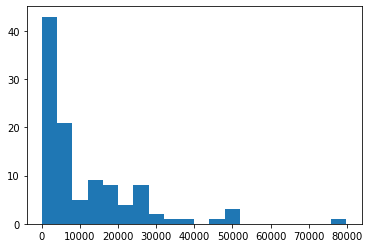

In [27]:
print(iq.shape[1] * scan_step)
grains_EBSD[:, 5].max()
# grain size histogram
plt.hist(grains_EBSD[good_grains[0], 9], bins=20)

#plt.xlim(0, 2000)
#plt.ylim(0, 50)
plt.show()

[1.96000e+02 4.16080e+01 1.07675e+02 3.24500e+01 5.64251e+02 3.70922e+02
 4.09179e+04 1.20000e-01 0.00000e+00 4.91400e+04]


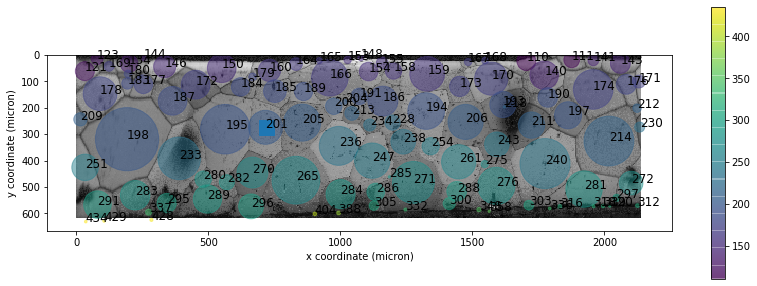

In [28]:
from matplotlib import pyplot as plt, cm
%matplotlib inline

plt.figure(figsize=(14, 5))
plt.imshow(iq.T, origin='upper', interpolation='nearest', cmap=cm.gray,
           extent=(0, scan_step * iq.shape[0], scan_step * iq.shape[1], 0))
plt.scatter(grains_EBSD[good_grains[0], 4], grains_EBSD[good_grains[0], 5] - 90, s=0.05*grains_EBSD[good_grains[0], 9], c=grains_EBSD[good_grains[0], 0], alpha=0.5)
for gid in good_grains[0]:
    plt.annotate('%d' % gid, xycoords='data', xy=(grains_EBSD[gid, 4], grains_EBSD[gid, 5] - 90), color='k', fontsize=12)
N = 201
plt.plot(grains_EBSD[N, 4], grains_EBSD[N, 5] - 90, 's', markersize=15)
plt.colorbar()
plt.xlabel('x coordinate (micron)')
plt.ylabel('y coordinate (micron)')
# look at grain number 195
print(grains_EBSD[195])

In [44]:
# transformation matrix from A1A2A3 (EBSD) to XYZ (DCT)
T = np.array([[ 0., 0., -1.],
              [ 1., 0.,  0.],
              [ 0.,-1.,  0.]])

from pymicro.crystal.microstructure import Microstructure, Grain, Orientation

matching_ids = [(195, 9), (201, 24), (270, 66), (205, 32), (185, 79)]  # (ebsd, dct)
for i in range(5):
    id_ebsd = matching_ids[i][0]
    id_dct = matching_ids[i][1]
    o_tsl = Orientation.from_euler(grains_EBSD[id_ebsd, 1:4])
    g_xyz = np.dot(o_tsl.orientation_matrix(), T.T)  # move to XYZ local frame
    o_xyz = Orientation(g_xyz).move_to_FZ(symmetry=Ti7Al._symmetry)
    g = Grain(id_ebsd, o_xyz)
    g.position = np.array([grains_EBSD[id_ebsd, 4], grains_EBSD[id_ebsd, 5] - 90, 0.])
    #print(g)

    # compute disorientation with DCT
    dis = g.orientation.disorientation(micro.get_grain(id_dct).orientation, crystal_structure=Ti7Al._symmetry)
    print('disorientation between EBSD and DCT is {:.1f} degrees'.format(np.degrees(dis[0])))

disorientation between EBSD and DCT is 6.5 degrees
disorientation between EBSD and DCT is 6.6 degrees
disorientation between EBSD and DCT is 7.3 degrees
disorientation between EBSD and DCT is 6.2 degrees
disorientation between EBSD and DCT is 6.4 degrees


DCT calculations
--

In [24]:
from pymicro.xray.detectors import RegArrayDetector2d

# DCT detector
u_dir = np.array([0.0044, 1.0, -6.0725e-04])
v_dir = np.array([0.0046, -6.2759e-04, -1.0])
w_dir = np.cross(u_dir, v_dir)
P_t5_ = np.array([u_dir, v_dir, w_dir]).T
detector = RegArrayDetector2d(size=(2048, 2048), P=P_t5_)
detector.pixel_size = 0.0014
detector.ref_pos = [7.0302, 0.01, 0.0]
print(detector.u_dir)
print(detector.v_dir)

[ 4.4000e-03  1.0000e+00 -6.0725e-04]
[ 4.6000e-03 -6.2759e-04 -1.0000e+00]


>> p.parameters.detgeo
ans = 
      detrefpos: [7.0302 0.0100 0]
       detsizeu: 2048
       detsizev: 2048
        detrefu: 1.0245e+03
        detrefv: 1.0245e+03
        detdiru: [0.0044 1.0000 -6.0725e-04]
        detdirv: [0.0046 -6.2759e-04 -1.0000]
     pixelsizeu: 0.0014
     pixelsizev: 0.0014
    detanglemin: 0
    detanglemax: 16.2052
      detscaleu: 714.2857
      detscalev: 714.2857
        detnorm: [-1.0000 0.0044 -0.0046]
        detorig: [7.0173 -1.4234 1.4352]
           Qdet: [2x3 double]


In [22]:
from pymicro.crystal.microstructure import Grain, Orientation

# load experimental infos
gid = 9
#exec('from t5_dct_cen_1_g%d import *' % gid)

# define our grain
ndx = 6  # chose experimental index here
data_dir = os.path.join('id11', 't5_', 't5_dct_cen_1_')
with h5py.File(os.path.join(data_dir, '4_grains/phase_01/grain_%04d.mat' % gid)) as gmat:
    g = Grain(gid, Orientation.from_rodrigues(gmat['R_vector'][()]))
    g_om_exp = gmat['om_exp'][:, ndx]
    g_uv_exp = gmat['uv_exp'][:, ndx]
    g_center = gmat['center'][:, 0]
    # grab the projection stack
    proj_dif_exp = gmat['proj/stack'][()].transpose(1, 2, 0)  # now in [ndx, u, v] form
    print(proj_dif_exp.shape)  # 371, 340
    h, k, i, l = gmat['allblobs/hklsp'][:, ndx]
print(h, k, i, l) # should be 1, -1, 0, 0

from pymicro.crystal.lattice import HklPlane, Symmetry
(h, k, l) = HklPlane.four_to_three_indices(h, k, i, l)
hkl_dif = HklPlane(h, k, l, Ti7Al)
print(hkl_dif)


(59, 371, 340)
1.0 -1.0 0.0 0.0
HKL Plane
 Miller indices:
 h : 1.0
 k : -1.0
 l : 0.0
 plane normal : [ 0.8660254 -0.5        0.       ]
 crystal lattice : Lattice
 abc : 0.3 0.3 0.5
 angles : 90.0 90.0 120.0
 volume : 0.0349
 A : 0.3 0.0 0.0
 B : -0.1 0.3 0.0
 C : 0.0 0.0 0.5


In [23]:
# predict both omega angles for this plane
w1, w2 = g.dct_omega_angles(hkl_dif, lambda_keV, verbose=True)

# chose the omega closest to the experimental value
omega = w1 if abs(w1 - g_om_exp) < abs(w2 - g_om_exp) else w2
print('%.2f value was chosen as it is closer to the experimental value of %.2f' % (omega, g_om_exp))

# predict omega and position on detector
omegar = omega * np.pi / 180
R = np.array([[np.cos(omegar), -np.sin(omegar), 0], [np.sin(omegar), np.cos(omegar), 0], [0, 0, 1]])
g_pos_rot = np.dot(R, g_center)

X = np.array([1., 0., 0.]) / lambda_nm
gt = g.orientation_matrix().transpose()
G = np.dot(R, np.dot(gt, p.scattering_vector()))
K = X + G
pg = detector.project_along_direction(K, g_pos_rot)
(up, vp) = detector.lab_to_pixel(pg)[0]
print('spot located in image full%04d.edf at position (%d, %d) -- prediction is (%d, %d)' % 
      (int(g_om_exp / 0.1), g_uv_exp[0], g_uv_exp[1], up, vp))


Bragg angle for 1-10 at 38.0 keV is 3.7 deg

A=3.150, B=2.300, C=-0.253, Delta=60.6
the two omega values in degrees fulfilling the Bragg condition are (302.4, 129.9)
129.86 value was chosen as it is closer to the experimental value of 129.90
spot located in image full1298.edf at position (1496, 1015) -- prediction is (1495, 1015)


In [28]:
from matplotlib import pyplot as plt, cm
from pymicro.crystal.microstructure import Microstructure
%matplotlib inline

from scipy import ndimage
# predict the spot on the detector using forward simulation
grain_data = np.where(grain_ids == gid, 1, 0)
data_dif = grain_data[ndimage.find_objects(grain_ids == gid)[0]]  # (X, Y, Z) coordinate system
print(data_dif.shape)

from pymicro.xray.xray_utils import radiographs
proj_dif_sim = radiographs(data_dif, [g_om_exp])  # (Y, Z) coordinate system
proj_dif_sim = proj_dif_sim.transpose(2, 0, 1)[:, :, ::-1]  # (u, v) axes correspond to (Y, -Z) for DCT detector
padding = np.array(proj_dif_exp[ndx].shape) / 3 - np.array(proj_dif_sim.shape[1:])
p, q = padding / 2
proj_dif_sim = np.pad(proj_dif_sim, ((0, 0), (p, padding[0] - p), (q, padding[1] - q)), 'constant')
print(data_dif.shape)
print(proj_dif_sim.shape)
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
ax1.matshow(proj_dif_sim[0].T, cmap=cm.gray)
ax1.set_title('simulated')
plt.axis('off')
ax2 = fig.add_subplot(122)
ax2.matshow(proj_dif_exp[ndx].T, cmap=cm.gray)
ax2.set_title('experimental')
plt.axis('off')
plt.show()

(42, 74, 55)


ValueError: Buffer dtype mismatch, expected 'double' but got Python object

Topotomo alignments
--

double check the TT alignments, for example for grain 9 and 24 in scan `t5_dct_cen_1`:

`
def t5_dct_cen_1_grain0009_ttpar_1 '{
	umv diffry -5.445893 samrx 0.209711 samry -13.486030 samtx 0.256680 samty -0.015831 samtz -4.597468 nfdtx 116.200000 d3tz 3.931160
	TT_PAR["start"] = -6.245893
	TT_PAR["end"] = -4.645893
	TT_PAR["images"] = 64
}'
`

and grain 5:

`
def t5_dct_cen_1_grain0085_ttpar_1 '{
	umv diffry -6.395715 samrx 13.051581 samry -5.747880 samtx 0.302943 samty -0.145185 samtz -4.475041 nfdtx 116.200000 d3tz 4.638369
	TT_PAR["start"] = -7.195715
	TT_PAR["end"] = -5.595715
	TT_PAR["images"] = 64
}'
`

and grain 24:

`
def t5_dct_cen_grain0024_ttpar_1 '{
	umv diffry -7.553499 samrx -4.375127 samry -9.930178 samtx 0.233846 samty -0.004869 samtz -4.891631 nfdtx 116.200000 d3tz 5.515114
	TT_PAR["start"] = -7.790999
	TT_PAR["end"] = -7.315999
	TT_PAR["images"] = 19
}'
`

In [14]:
tt_grain_ids = [85, 17, 12, 9, 79, 24, 32, 66, 1, 16, 4]
tt_hkl = ['110', '110', '112', '102', '112', '112', '110', '110', '110', '112', '110']
exp_samrx = [13.051581, -10.736496, 2.207744, 0.209711, 11.250639, -4.472088, 2.641216, -10.055702, 13.587913, -3.518023, -9.582956]
exp_samry = [-5.747880, 7.038624, 2.073922, -13.486030, 4.667972, -10.506809, -12.209316, 6.646150, -7.595539, -3.206210, -13.618135]
tt_id = 32

A reflexion of type {1, 0, -2} == {1, 0, -1, -2} is aligned for grain 9, bragg angle is 5.43 deg, looking at all the lattice planes in this family, the aligned reflection is (0, -1, 2) == (0, -1, 1, 2)

In [15]:
from pymicro.crystal.lattice import Symmetry, HklPlane, HklDirection, SlipSystem

hkl_str = tt_hkl[tt_grain_ids.index(tt_id)]
print('selecting family {%s} for topotomography' % hkl_str)
family = HklPlane.get_family(hkl_str, lattice=Ti7Al, crystal_structure=Symmetry.hexagonal)
for hkl in family:
    theta = hkl.bragg_angle(lambda_keV)
    print('bragg angle for %s reflection is %.2f deg' % (hkl.miller_indices(), theta * 180. / np.pi))

selecting family {110} for topotomography
bragg angle for (1, 1, 0) reflection is 6.39 deg
bragg angle for (2, -1, 0) reflection is 6.39 deg
bragg angle for (-1, 2, 0) reflection is 6.39 deg


In [147]:
from pymicro.crystal.microstructure import Orientation
samrx = []
samry = []
hkl_difs = []
for tt_id in tt_grain_ids:
    print('**looking at grain %d' % tt_id)
    grain = micro.get_grain(tt_id)
    hkl_str = tt_hkl[tt_grain_ids.index(tt_id)]
    family = HklPlane.get_family(hkl_str, lattice=Ti7Al, crystal_structure=Symmetry.hexagonal)
    # verify topotomo alignment
    for hkl in family:
        h, k, l = hkl.miller_indices()
        i = -(h + k)
        #print('* (%d%d%d%d) reflection' % (h, k, i, l))
        (ut, lt) = np.degrees(grain.orientation.topotomo_tilts(hkl, verbose=False))
        if abs(ut) < 20 and abs(lt) < 15:
            samrx.append(lt - 0.3)
            samry.append(ut + 1.52)
            hkl_difs.append(HklPlane(h, k, l, lattice=Ti7Al))
            print('aligned reflection will be (%d%d%d%d)' % (h, k, i, l))

**looking at grain 85
aligned reflection will be (11-20)
**looking at grain 17
aligned reflection will be (-12-10)
**looking at grain 12
aligned reflection will be (11-22)
**looking at grain 9
aligned reflection will be (01-1-2)
**looking at grain 79
aligned reflection will be (11-2-2)
**looking at grain 24
aligned reflection will be (11-2-2)
**looking at grain 32
aligned reflection will be (2-1-10)
**looking at grain 66
aligned reflection will be (11-20)
**looking at grain 1
aligned reflection will be (2-1-10)
**looking at grain 16
aligned reflection will be (-12-12)
**looking at grain 4
aligned reflection will be (11-20)


In [138]:
print(np.mean(np.array(exp_samrx) - np.array(samrx)))
print(np.mean(np.array(exp_samry) - np.array(samry)))

-0.008828340281344412
0.0032217483624141785


In [183]:
from math import cos, sin, pi
check = 0
hkl_dif = hkl_difs[check]
(ut, lt) = micro.get_grain(tt_grain_ids[check]).orientation.topotomo_tilts(hkl_dif, verbose=True)
theta = hkl_dif.bragg_angle(lambda_keV, verbose=True)
gt = micro.get_grain(tt_grain_ids[check]).orientation_matrix().transpose()
Gs = np.dot(gt, hkl_dif.scattering_vector())
print('d-spacing is %.3f nm' % hkl_dif.interplanar_spacing())
print('norm of Gs: %.3f nm^-1' % np.linalg.norm(Gs))

U = np.array([[cos(ut), 0, sin(ut)], [0, 1, 0], [-sin(ut), 0, cos(ut)]])
L = np.array([[1, 0, 0], [0, cos(lt), -sin(lt)], [0, sin(lt), cos(lt)]])
S = np.dot(L, U)
print('tilt matrix S:')
print(S)
T = np.array([[cos(-theta), 0, sin(-theta)], [0, 1, 0], [-sin(-theta), 0, cos(-theta)]])  # base tilt
Gt = np.dot(S, Gs)
Gl = np.dot(T, Gt)
print('scattering vector tilted by samrx and samry: Gt = [%.3f, %.3f, %.3f] with norm %.3f' % (Gt[0], Gt[1], Gt[2], np.linalg.norm(Gt)))
print('scattering vector further tilted bt base tilt Gl = [%.3f, %.3f, %.3f]' % (Gl[0], Gl[1], Gl[2]))

up tilt (samry) should be -7.644
low tilt (samrx) should be 13.252

Bragg angle for 110 at 38.0 keV is 6.4 deg

d-spacing is 0.147 nm
norm of Gs: 6.824 nm^-1
tilt matrix S:
[[ 0.99111473  0.         -0.13300974]
 [-0.03048974  0.97337243 -0.22719264]
 [ 0.12946801  0.2292294   0.96472375]]
scattering vector tilted by samrx and samry: Gt = [0.000, -0.000, 6.824] with norm 6.824
scattering vector further tilted bt base tilt Gl = [-0.760, -0.000, 6.781]


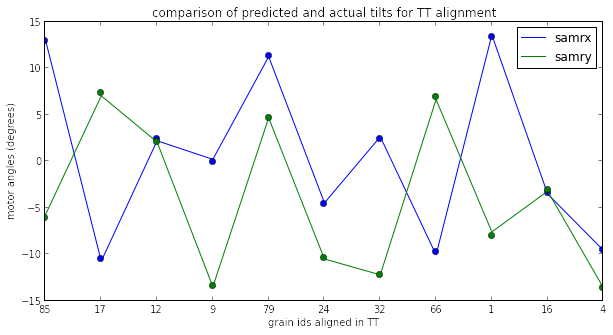

In [139]:
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10, 5))
plt.plot(exp_samrx, 'b-', label='samrx')
plt.plot(samrx, 'bo')
plt.plot(exp_samry, 'g-', label='samry')
plt.plot(samry, 'go')
plt.ylim(-15, 15)
plt.xticks(np.arange(11), tt_grain_ids)
plt.xlabel('grain ids aligned in TT')
plt.ylabel('motor angles (degrees)')
plt.title('comparison of predicted and actual tilts for TT alignment')
plt.legend(numpoints=1)
plt.show()

Visualization of active slip
--

In [189]:
from pymicro.crystal.lattice import HklDirection, SlipSystem

gid = 9  # active slip for grain 9 is basal
grain = micro.get_grain(gid)
hkl_dif = hkl_difs[tt_grain_ids.index(gid)]
print(hkl_dif)

# slip planes
p_basal = HklPlane(0, 0, 1, Ti7Al)  # basal plane
p_prism1 = HklPlane(0, 1, 0, lattice=Ti7Al)
p_prism2 = HklPlane(-1, 0, 0, lattice=Ti7Al)
p_prism3 = HklPlane(-1, 1, 0, lattice=Ti7Al)

# basal slip systems
bss1 = SlipSystem(p_basal, HklDirection(*HklDirection.four_to_three_indices(2, -1, -1, 0), lattice=Ti7Al))
bss2 = SlipSystem(p_basal, HklDirection(*HklDirection.four_to_three_indices(-1, 2, -1, 0), lattice=Ti7Al))
bss3 = SlipSystem(p_basal, HklDirection(*HklDirection.four_to_three_indices(-1, -1, 2, 0), lattice=Ti7Al))
basal_slip_systems = [bss1, bss2, bss3]

# prismatic slip systems
pss1 = SlipSystem(p_prism1, HklDirection(*HklDirection.four_to_three_indices(2, -1, -1, 0), lattice=Ti7Al))
pss2 = SlipSystem(p_prism2, HklDirection(*HklDirection.four_to_three_indices(-1, 2, -1, 0), lattice=Ti7Al))
pss3 = SlipSystem(p_prism3, HklDirection(*HklDirection.four_to_three_indices(-1, -1, 2, 0), lattice=Ti7Al))
prism_slip_systems = [pss1, pss2, pss3]

print(grain.orientation.compute_all_schmid_factors(basal_slip_systems, load_direction=[0., 0., 1]))
print(grain.orientation.compute_all_schmid_factors(prism_slip_systems, load_direction=[0., 0., 1]))

HKL Plane
 Miller indices:
 h : 0
 k : 1
 l : -2
 plane normal : [ 0.          0.67889444 -0.73423589]
 crystal lattice : Lattice
 abc : 0.3 0.3 0.5
 angles : 90.0 90.0 120.0
 volume : 0.0349
 A : 0.3 0.0 0.0
 B : -0.1 0.3 0.0
 C : 0.0 0.0 0.5
[0.16348832815186282, 0.3236108325008647, 0.4870991606527274]
[0.17579953686140282, 0.2792506582525189, 0.10345112139111604]


In [190]:
from math import cos, sin, pi

(ut, lt) = grain.orientation.topotomo_tilts(hkl_dif, verbose=True)
theta = hkl_dif.bragg_angle(lambda_keV, verbose=True)
gt = grain.orientation_matrix().transpose()
Gs = np.dot(gt, hkl_dif.scattering_vector())
print('d-spacing is %.3f nm' % hkl_dif.interplanar_spacing())
print('norm of Gs: %.3f nm^-1' % np.linalg.norm(Gs))

U = np.array([[cos(ut), 0, sin(ut)], [0, 1, 0], [-sin(ut), 0, cos(ut)]])
L = np.array([[1, 0, 0], [0, cos(lt), -sin(lt)], [0, sin(lt), cos(lt)]])
S = np.dot(L, U)
print('tilt matrix S:')
print(S)
T = np.array([[cos(-theta), 0, sin(-theta)], [0, 1, 0], [-sin(-theta), 0, cos(-theta)]])  # base tilt
Gt = np.dot(S, Gs)
Gl = np.dot(T, Gt)
print('scattering vector tilted by samrx and samry: Gt = [%.3f, %.3f, %.3f] with norm %.3f' % (Gt[0], Gt[1], Gt[2], np.linalg.norm(Gt)))
print('scattering vector further tilted bt base tilt Gl = [%.3f, %.3f, %.3f]' % (Gl[0], Gl[1], Gl[2]))

up tilt (samry) should be -14.969
low tilt (samrx) should be 0.241

Bragg angle for 01-2 at 38.0 keV is 5.4 deg

d-spacing is 0.172 nm
norm of Gs: 5.803 nm^-1
tilt matrix S:
[[ 0.96606652  0.         -0.25829339]
 [-0.00108831  0.99999112 -0.00407048]
 [ 0.2582911   0.00421345  0.96605795]]
scattering vector tilted by samrx and samry: Gt = [0.000, 0.000, -5.803] with norm 5.803
scattering vector further tilted bt base tilt Gl = [0.549, 0.000, -5.777]


9
(0.8745098039215686, 0.00784313725490196, 0.7450980392156863)
9
(0.8745098039215686, 0.00784313725490196, 0.7450980392156863)
[-100.           -0.          -19.19194679]
(-100.0, -0.0, -19.191946789971254)


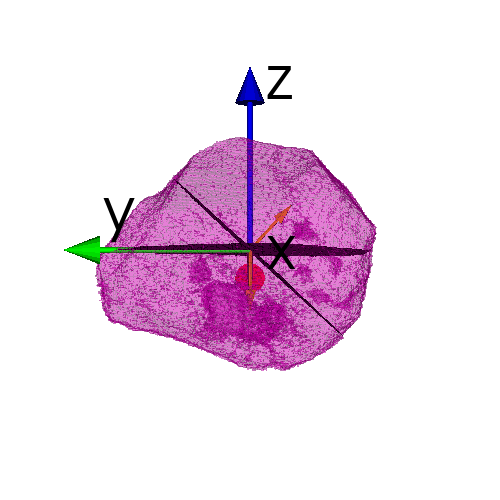

In [191]:
from pymicro.view.vtk_utils import *

# display grain in TT condition
n = 48  # topograph 48 shows slip traces for grain 9
omegar = 4 * n * pi / 180
#omegar = omegas_edge_on[hkl_index][omega_index] * pi / 180
R = np.array([[cos(omegar), -sin(omegar), 0], [sin(omegar), cos(omegar), 0], [0, 0, 1]])  # turntable

hkl_index = 0
z_offsets = [0]
plane_origins = np.zeros((1, 3), dtype=float)
plane_origins[:, 2] = z_offsets[hkl_index]

# create the grain actor
grain_with_planes = grain_3d(grain, show_orientation=False)
grain_with_planes = grain_3d(grain, [hkl_dif, p_basal], show_normal=True, plane_opacity=1.0, show_orientation=False)
apply_rotation_to_actor(grain_with_planes, np.dot(T, np.dot(R, S)))

# 3d scene
s3d_par = Scene3D(display=True, ren_size=(500, 500), name='tt_g%02d' % gid)
s3d_par.add(grain_with_planes)
axes = axes_actor(length=np.mean(grain_ids.shape), fontSize=60)
s3d_par.add(axes)
cam_par = setup_camera(grain_ids.shape)
cam_pos = - 100 * np.array([1, 0., np.tan(2 * theta)])  # look in the diffraction direction
print(cam_pos)
cam_par.SetPosition(cam_pos)
cam_par.SetFocalPoint(grain.position)
cam_par.ParallelProjectionOn()
cam_par.Zoom(0.005)
s3d_par.set_camera(cam_par)
print(cam_par.GetPosition())

# save and display 3d image
im = s3d_par.get_frame()
#from IPython.display import Image
#Image(im)
with open('edge_on_g%02d_(%d%d%d%d)_vtk.png' % (gid, h, k, -(h + k), l), 'wb') as png:
    png.write(im)
print('done')



determined header size is 512 bytes
('DoubleValue', <type 'numpy.float64'>)
determined header size is 512 bytes
('DoubleValue', <type 'numpy.float64'>)


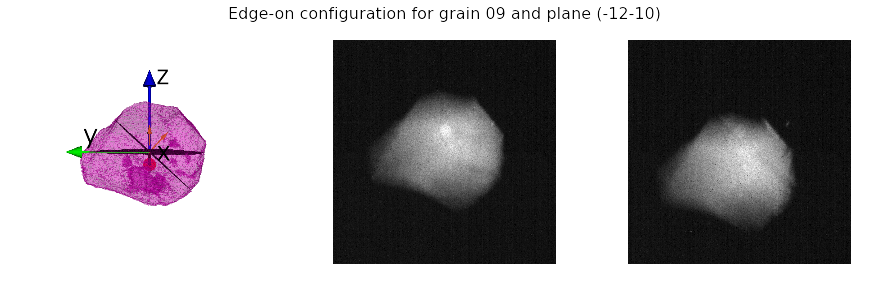

In [203]:
import os
from pymicro.file.file_utils import edf_read
from matplotlib import pyplot as plt, cm

data_dir = os.path.join(os.environ['RAWDATA'], '2018_ma3921', 't5_')

fig = plt.figure(figsize=(15, 4))
plt.text(0.5, 1.1, 'Edge-on configuration for grain %02d and plane (%d%d%d%d)' % (gid, h, k, i, l), 
         ha='center', size=16)

plt.axis('off')
img_vtk_name = 'edge_on_g%02d_(%d%d%d%d)_vtk.png' % (gid, h, k, -(h + k), l)
img_vtk = plt.imread(img_vtk_name)
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(img_vtk)
plt.axis('off')

ax2 = fig.add_subplot(1, 3, 2)
tt_stack_path = os.path.join(data_dir, 'grain%04d_tt_1_stack.edf' % gid)
tt_stack = edf_read(tt_stack_path)
ax2.matshow(tt_stack[:, :, n].T, cmap=cm.gray, vmin=1800, vmax=2800)
plt.axis('off')

ax3 = fig.add_subplot(1, 3, 3)
tt_stack_path = os.path.join(data_dir, 'grain%04d_tt_2_stack.edf' % gid)
tt_stack = edf_read(tt_stack_path)
ax3.matshow(tt_stack[:, :, n].T, cmap=cm.gray, vmin=2000, vmax=3000)
plt.axis('off')

plt.savefig('edge_on_g09_tt.pdf')
plt.show()

Slip systems analysis
--

In [18]:
# slip planes
p_basal = HklPlane(0, 0, 1, Ti7Al)  # basal plane
p_prism1 = HklPlane(0, 1, 0, lattice=Ti7Al)
p_prism2 = HklPlane(-1, 1, 0, lattice=Ti7Al)
p_prism3 = HklPlane(-1, 0, 0, lattice=Ti7Al)

In [19]:
import numpy as np
# read avergae EBSD grain orientations
#grains_EBSD = np.genfromtxt('EBSD_beforeDef.txt')
grains_EBSD = np.genfromtxt('EBSD_beforeDef_ids.txt')
print(grains_EBSD.shape)
print(grains_EBSD[69])

(446, 10)
[7.00000e+01 2.86454e+02 1.05474e+02 1.29360e+02 7.10000e+02 4.80000e+01
 1.10517e+04 2.10000e-02 0.00000e+00 3.20000e+01]


Grain
 * id = 9
 * Crystal Orientation
orientation matrix = [[ 0.93117807 -0.26740042 -0.24779914]
 [ 0.01355197  0.7046318  -0.7094437 ]
 [ 0.36431269  0.65726025  0.65976149]]
Euler angles (degrees) = ( 151.001,  48.718, 199.254)
Rodrigues vector = [-0.41470926  0.1857377  -0.0852515 ]
 * position [[-0.25945231]
 [ 0.01951914]
 [-0.11399903]]
 * has vtk mesh ? True



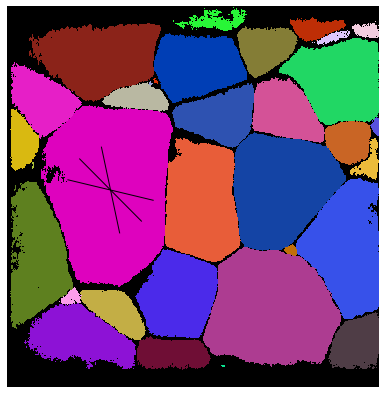

In [30]:
# plot slip planes traces on top of DCT front slice
g9 = micro.get_grain(9)
print(g9)
#print(g9.orientation.inFZ(symmetry=Symmetry.hexagonal))
p_prism1 = HklPlane(0, 1, 0, lattice=Ti7Al)
p_prism2 = HklPlane(-1, 1, 0, lattice=Ti7Al)
p_prism3 = HklPlane(-1, 0, 0, lattice=Ti7Al)
slip_prism = [p_prism1, p_prism2, p_prism3]
n_int = np.array([-1, 0, 0])
view_up = np.array([0, 1, 0])

plt.figure(figsize=(7, 7))
plt.imshow(front_slice, interpolation='nearest', cmap=rand_cmap)
# compute the ceter of grain 9 in pixel
x0 = front_slice.shape[0] // 2 + g9.position[2] / 0.0015
y0 = front_slice.shape[1] // 2 - g9.position[1] / 0.0015
x0, y0 = centers[1, 1], centers[1, 0]  # grain 9 is index 1 in centers array
for p in slip_prism:
    trace = p.slip_trace(g9.orientation, n_int, view_up, trace_size=100, verbose=False)
    x = x0 + np.array([-trace[0] / 2, trace[0] / 2])
    y = y0 + np.array([-trace[1] / 2, trace[1] / 2])
    plt.plot(x, y, 'k-', linewidth=1)
plt.axis('off')
plt.show()

In [71]:
# plot slip planes traces on top of the EBSD image using EBSD orientations
import h5py
f = h5py.File('EBSD_beforeDef.h5')
nrows = f['EBSD_beforeDef/EBSD/Header/nRows'][0]
ncols = f['EBSD_beforeDef/EBSD/Header/nColumns'][0]
scan_step = f['EBSD_beforeDef/EBSD/Header/Step X'][0]
iq = np.reshape(f['EBSD_beforeDef/EBSD/Data/IQ'], (nrows, ncols)).T  # [x, y] form with x being the horizontal coordinate
f.close()
print(iq.shape)
print('EBSD scan step is %.1f microns' % scan_step)

(534, 154)
EBSD scan step is 4.0 microns


In [41]:
# transformation matrix from A1A2A3 (EBSD) to XYZ (DCT)
T = np.array([[ 0., 0., -1.],
              [ 1., 0.,  0.],
              [ 0.,-1.,  0.]])

from pymicro.crystal.microstructure import Microstructure, Grain, Orientation

micro_EBSD = Microstructure()
for i in good_grains[0]:
    #print(grains[i, 1:4])
    o_tsl = Orientation.from_euler(grains_EBSD[i, 1:4])
    g_xyz = np.dot(o_tsl.orientation_matrix(), T.T)  # move to XYZ local frame
    o_xyz = Orientation(g_xyz).move_to_FZ(symmetry=Ti7Al._symmetry)
    g = Grain(i, o_xyz)
    g.position = np.array([grains_EBSD[i, 4], grains_EBSD[i, 5], 0.])
    micro_EBSD.grains.append(g)

(-116.99514034777626,
 2259.278487205998,
 666.6286001318741,
 -36.024519902143425)

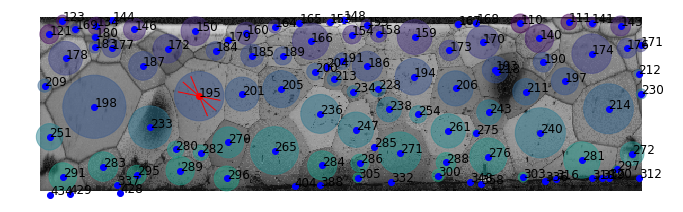

In [43]:
p_prism1 = HklPlane(0, 1, 0, lattice=Ti7Al)
p_prism2 = HklPlane(-1, 1, 0, lattice=Ti7Al)
p_prism3 = HklPlane(-1, 0, 0, lattice=Ti7Al)
slip_prism = [p_prism1, p_prism2, p_prism3]
n_int = np.array([-1, 0, 0])
view_up = np.array([0, 1, 0])

plt.figure(figsize=(12, 4))
plt.imshow(iq.T, origin='upper', interpolation='nearest', cmap=cm.gray,
           extent=(0, scan_step * iq.shape[0], scan_step * iq.shape[1], 0))
plt.scatter(grains_EBSD[good_grains[0], 4], grains_EBSD[good_grains[0], 5] - 90, s=0.05*grains_EBSD[good_grains[0], 9], c=grains_EBSD[good_grains[0], 0], alpha=0.5)
for gid in good_grains[0]:
    plt.annotate('%d' % gid, xycoords='data', xy=(grains_EBSD[gid, 4], grains_EBSD[gid, 5] - 90), color='k', fontsize=12)
for g in micro_EBSD.grains:
    if g.id == 195:
        #print(micro.get_grain(9).orientation)
        #print('---')
        #print(g.orientation)
        plt.plot(g.position[0], g.position[1] -90, 'ro')
        # prismatic slip traces
        for p in slip_prism:
            trace = p.slip_trace(g.orientation, n_int, view_up, trace_size=150, verbose=False)
            x = g.position[0] + np.array([-trace[0] / 2, trace[0] / 2])
            y = g.position[1] + np.array([-trace[1] / 2, trace[1] / 2])
            plt.plot(x, y - 90, 'r-', linewidth=1)
    else:
        plt.plot(g.position[0], g.position[1] - 90, 'bo')
plt.axis('off')